## 예시로 익숙해지기 (선형 회귀)

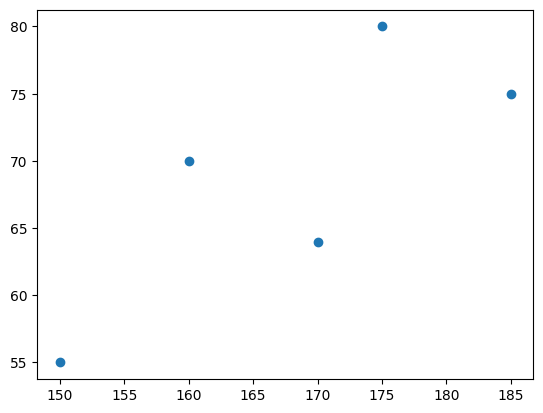

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
plt.plot(x,y,'o')

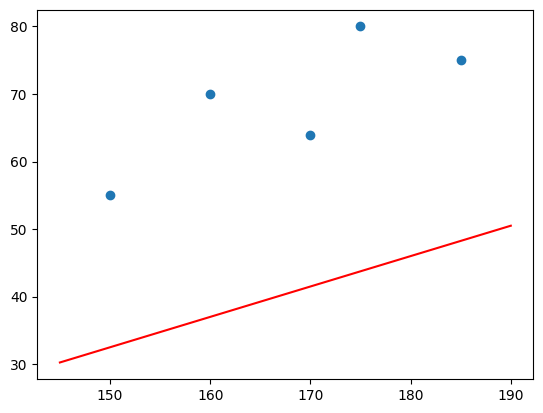

In [ ]:
a = 0.45
b = -35
x_plot=np.linspace(145,190,100)
y_plot=a * x_plot + b

plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

optimal a = [0.56262626]
optimal b = [-25.75757576]


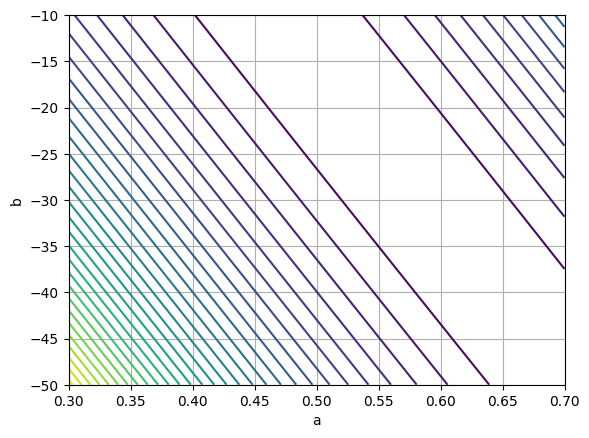

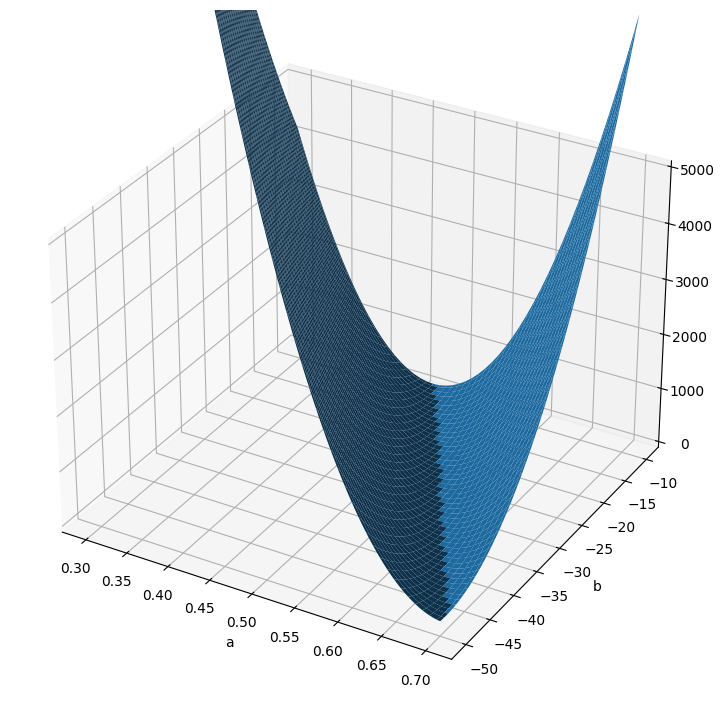

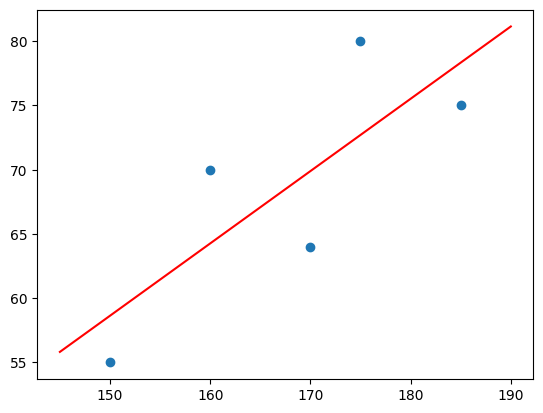

In [ ]:
a = 0.5 + np.linspace(-0.2,0.2,100)
b = -30 + np.linspace(-20,20,100)

A, B = np.meshgrid(a,b)

# L=np.zeros_like(A)
# for i in range(5):
    # L += (y[i] - (A*x[i]+B))**2

L=np.zeros((len(b),len(a)))
for i in range(len(b)):
    for j in range(len(a)):
        for n in range(len(x)):
            L[i,j] = L[i,j] + (y[n] - (a[j]*x[n]+b[i]))**2

plt.contour(a,b,L,30)
plt.xlabel('a'); plt.ylabel('b'); plt.grid()

plt.figure(figsize=[10, 9])
ax = plt.axes(projection="3d")
ax.plot_surface(A,B,L);
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.set_zlim([0, 5000])

a_opt = A[L==np.min(L)]
b_opt = B[L==np.min(L)]
print(f"optimal a = {a_opt}")
print(f"optimal b = {b_opt}")

plt.figure()
x_plot=np.linspace(145,190,100)
y_plot=a_opt * x_plot + b_opt
plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=a, y=b, z=L, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Loss', width=700, height=600,
                  scene = dict( zaxis=dict(nticks=20, range=[0,5000]) ))

tensor(-47545.)
tensor(-282.)
tensor(0.4975) tensor(-34.9997)


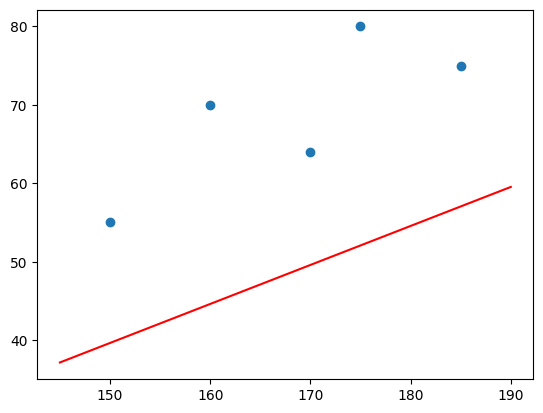

In [ ]:
import torch
a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)

L=0
for i in range(5):
    L += (y[i] - (a*x[i]+b))**2

L.backward()
print(a.grad)
print(b.grad)

LR = 1e-6
a=a.detach()-LR*a.grad
b=b.detach()-LR*b.grad
print(a,b)


y_plot = a * x_plot + b
plt.plot(x,y,"o")
plt.plot(x_plot,y_plot,'r')

tensor(-34056.0078)
tensor(-202.1216)
tensor(0.5316) tensor(-34.9995)


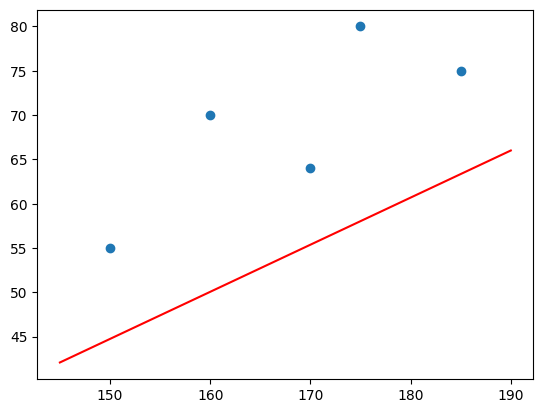

In [ ]:
# 여러번 실행하면 점점 바뀜
a.requires_grad=True
b.requires_grad=True

L=0
for i in range(5):
    L += (y[i] - (a*x[i]+b))**2

L.backward()
print(a.grad)
print(b.grad)

LR = 1e-6
a=a.detach()-LR*a.grad
b=b.detach()-LR*b.grad
print(a,b)

x_plot=np.linspace(145,190,100)
y_plot=a * x_plot + b
plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

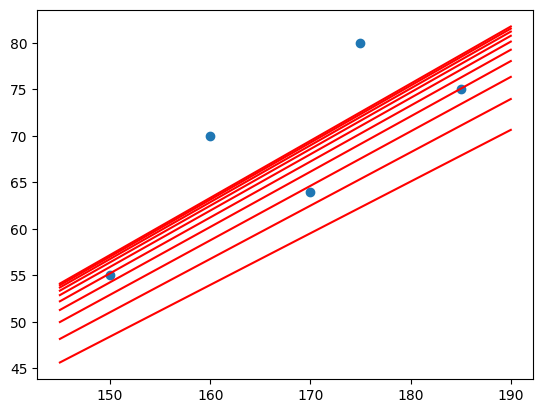

In [ ]:
EPOCH=10
LR = 1e-6
plt.plot(x,y,'o')
for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L=0
    for i in range(5):
        L += (y[i] - (a*x[i]+b))**2

    L.backward()

    a=a.detach()-LR*a.grad
    b=b.detach()-LR*b.grad

    y_plot=a * x_plot + b
    plt.plot(x_plot,y_plot,'r')

[0.44999998807907104, 0.4975450038909912, 0.5316010117530823, 0.555994987487793, 0.5734681487083435, 0.5859839916229248, 0.5949490070343018, 0.6013705134391785, 0.6059702038764954, 0.6092649102210999, 0.6116248369216919, 0.6133152842521667, 0.614526093006134, 0.6153934001922607, 0.6160146594047546, 0.6164596676826477, 0.6167783737182617, 0.6170066595077515, 0.6171702146530151, 0.6172873377799988, 0.6173712611198425]
[-35.0, -34.999717712402344, -34.999515533447266, -34.99937057495117, -34.999267578125, -34.99919128417969, -34.99913787841797, -34.99909973144531, -34.99907302856445, -34.999053955078125, -34.99903869628906, -34.999027252197266, -34.999019622802734, -34.99901580810547, -34.9990119934082, -34.99900817871094, -34.99900436401367, -34.99900436401367, -34.99900436401367, -34.99900436401367, -34.99900436401367]


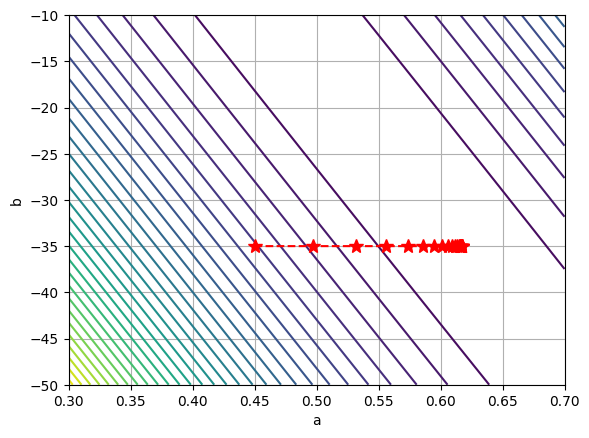

In [ ]:
# history 보기 - GD
import numpy as np
import matplotlib.pyplot as plt
import torch

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
x_plot=np.linspace(145,190,100)

EPOCH = 20
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)
a_hist=[a.detach().item()]
b_hist=[b.detach().item()]

for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L=0
    for i in range(5):
        L += (y[i] - (a*x[i]+b))**2

    L.backward()

    a=a.detach()-LR*a.grad
    b=b.detach()-LR*b.grad

    a_hist += [a.item()]
    b_hist += [b.item()]

a = 0.5 + np.linspace(-0.2,0.2,100)
b = -30 + np.linspace(-20,20,100)
A, B = np.meshgrid(a,b)

L = np.zeros_like(A)
for i in range(5):
    L += (y[i]-(A*x[i]+B))**2

plt.figure()
plt.contour(a,b,L,30); plt.xlabel("a"); plt.ylabel("b"); plt.grid()

plt.plot(a_hist,b_hist,"r*--",markersize=10)
print(a_hist)
print(b_hist)

[0.44999998807907104, 0.45764997601509094, 0.46986889839172363, 0.4784063398838043, 0.48751187324523926, 0.4925737679004669, 0.4995569884777069, 0.5075795650482178, 0.5119013786315918, 0.5207973122596741, 0.5243613123893738, 0.531113862991333, 0.5342136025428772, 0.5383464694023132, 0.5456225872039795, 0.547745406627655, 0.5544458031654358, 0.5564955472946167, 0.5579898953437805, 0.5630205869674683, 0.5651816129684448, 0.5708140134811401, 0.5751881003379822, 0.5765162110328674, 0.576853334903717, 0.5778946876525879, 0.5781521201133728, 0.5792773365974426, 0.5832180976867676, 0.587745726108551, 0.5882969498634338, 0.5888233184814453, 0.5884490609169006, 0.5888693928718567, 0.5923190116882324, 0.5962891578674316, 0.5961728692054749, 0.5992485284805298, 0.5992820858955383, 0.5983032584190369, 0.6019068956375122, 0.6007763743400574, 0.6007411479949951, 0.6035829186439514, 0.6068631410598755, 0.6060230135917664, 0.6091538071632385, 0.6115648150444031, 0.6104028224945068, 0.609934389591217, 

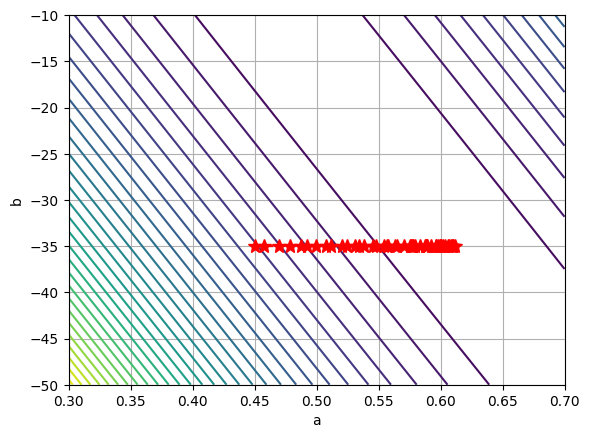

In [ ]:
# history 보기 - SGD
import numpy as np
import matplotlib.pyplot as plt
import torch
import random

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
x_plot=np.linspace(145,190,100)

EPOCH = 10
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)
a_hist=[a.detach().item()]
b_hist=[b.detach().item()]

for _ in range(EPOCH):

    shuffle_idx=list(range(5))
    random.shuffle(shuffle_idx)
    for i in shuffle_idx:
        a.requires_grad=True
        b.requires_grad=True

        L = (y[i] - (a*x[i]+b) )**2
        L.backward()

        a=a.detach()-LR*a.grad
        b=b.detach()-LR*b.grad

        a_hist += [a.item()]
        b_hist += [b.item()]

a = 0.5 + np.linspace(-0.2,0.2,100)
b = -30 + np.linspace(-20,20,100)
A, B = np.meshgrid(a,b)

L = np.zeros_like(A)
for i in range(5):
    L += (y[i]-(A*x[i]+B))**2

plt.figure()
plt.contour(a,b,L,30); plt.xlabel("a"); plt.ylabel("b"); plt.grid()

plt.plot(a_hist,b_hist,'r*--', markersize=10)
print(a_hist)
print(b_hist)

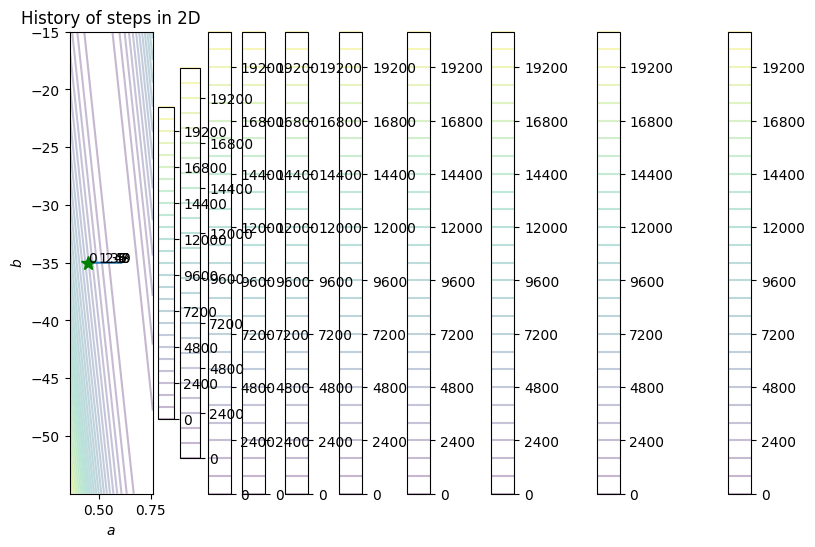

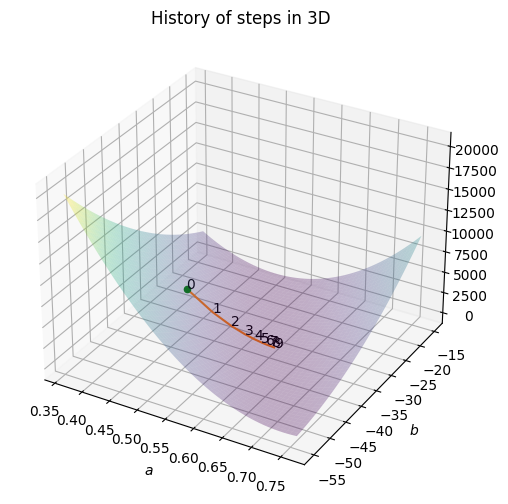

In [ ]:
# from 박진현
# hyper-parameters
epoch = 10
# lr = 8 * 1e-6 # learning rate
# lr = 7 * 1e-6 # learning rate
# lr = 5 * 1e-6 # learning rate
lr = 1 * 1e-6 # perfect learning rate

# weights
a = torch.tensor(0.45, requires_grad=True) # w1
b = torch.tensor(-35., requires_grad=True) # w0

# history of weights and loss
a_history = [a.detach().item()]
b_history = [b.detach().item()]
loss_history = []

# for text in plt
ps = [i for i in range(10)]

# data
x = [150, 160, 170, 175, 185]
y = [55, 70, 64, 80, 75]

for i in range(epoch):
    a.requires_grad = True
    b.requires_grad = True

    loss = 0 # loss == L
    for xi, yi in zip(x, y):
        loss = loss + (yi - (a * xi + b))**2

    loss_history.append(loss.detach().item())
    loss.backward() # start differentiation

    a = a.detach() - lr * a.grad # a.detach(): remove 'requires_grad=True' from a. get only the value
    b = b.detach() - lr * b.grad # b.detach(): remove 'requires_grad=True' from b. get only the value

    # size of a_history, a_history, and loss should be the same.
    if i != epoch - 1:
        a_history.append(a.detach().item())
        b_history.append(b.detach().item())

# modify the following a and b if necessary
# I recommend it to change the following when you change the learning rate
a = np.mean(a_history) + np.linspace(-0.2, +0.2, 100)
b = np.mean(b_history) + np.linspace(-20, +20, 100)

A, B = np.meshgrid(a, b)

L = np.zeros_like(A)
for xi, yi in zip(x, y):
    L = L + (yi - (A * xi + B))**2

# first plot
plt.figure(figsize=(10, 6))
plt.contour(A, B, L, 30, alpha=0.3)
plt.plot(a_history, b_history)
plt.plot(a_history[0], b_history[0], "g*", markersize=10)
plt.title("History of steps in 2D")
plt.xlabel('$a$')
plt.ylabel('$b$')
for a,b,p in zip(a_history, b_history, ps):
    plt.text(a, b, str(p))
    plt.colorbar()

# second plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(A, B, L, alpha=0.3, cmap='viridis')
ax.plot(a_history, b_history, loss_history)
ax.scatter(a_history[0], b_history[0], loss_history[0], c='green')
plt.title("History of steps in 3D")
plt.xlabel('$a$')
plt.ylabel('$b$')
for a,b,l,p in zip(a_history, b_history, loss_history, ps):
    ax.text(a, b, l, str(p))
# ax.set_zlim([0, 5000])